# Sentiment Analysis of Tweets
Regarding a specific stock

### Importing Libraries

In [249]:
import twint
# import nest_asyncio
# nest_asyncio.apply()
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Running Twint
Scraping Twitter for tweets

In [250]:
# Search stock
subject = "$TSLA"

In [251]:
%%capture
# Configuring Twint to search for the subject in the first specified city
c = twint.Config()

# The amount of tweets to return sorted by most recent
c.Limit = 200

# Input parameters
c.Search = subject

# Removing retweets
c.Filter_retweets = True

# No pictures or video
c.Media = False

# English only
c.Lang ='en'

# Excluding tweets with links
c.Links ='exclude'

# Making the results pandas friendly
c.Pandas = True

twint.run.Search(c)

# Assigning the DF
df = twint.storage.panda.Tweets_df

### Function
Assigning classes

In [252]:
def sentiment_class(score):
    """
    Labels each tweet based on its sentiment score
    """
    if score > 0:
        score = "Positive"
    elif score < 0:
        score ='Negative'
    else:
        score = 'Neutral'
        
    return score

In [253]:
# Instantiating the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Grabbing the sentiment scores and assigning them to a new column
df['sentiment'] = [sid.polarity_scores(df.tweet.iloc[i])['compound'] for i in range(len(df))]

# Labeling the tweets in a new column
df['feel'] = df.sentiment.apply(sentiment_class)

### Checking DataFrame
With new columns and tweets.

In [254]:
df[['tweet', 'sentiment', 'feel']]

tweet  sentiment      feel
0    You are like an artíste. The $TSLA play is an ...     0.7840  Positive
1    $tsla is a public company. But their factories...     0.7229  Positive
2    $TSLA  This is the pattern for after earning s...     0.6652  Positive
3    Is there any way to exclude people from a cash...    -0.6705  Negative
4                You’re back? Hooray!! LFG $TSLA!! 💪👻🔥     0.6671  Positive
5    Agree about being unpredictable but in most ca...    -0.3291  Negative
6    The only problem is that he never stopped talk...    -0.3855  Negative
7    $TSLA Higher, Lower or Flat on Earnings Today ...    -0.2960  Negative
8    Bought puts on $F and $TSLA going into earning...    -0.2263  Negative
9                   Today is the day, lets go $TSLA!!!     0.0000   Neutral
10   $tsla buyer 1.7mill 11/15 260C . This bet seem...     0.2235  Positive
11   $TSLA got some flyers strike $300 exp Friday. ...    -0.3956  Negative
12   $TSLA $MSFT $PYPL $EBAY reporting after the be...     0.0000   Neutral
13   Any investor worth their salt would read $TSLA...     0.8126  Positive
14   $TSLA Huge call options on oct25 weeklies, som...     0.3182  Positive
15   Got $SNAP wrong, $BA wrong (up big on my puts ...    -0.8047  Negative
16   Another cretin-related note: as Twitter seems ...     0.0422  Positive
17                                   $tsla earnings AH     0.0000   Neutral
18   @Tesla $TSLA tonight's report's REACTION will ...    -0.7615  Negative
19   Oh dear sweet, sweet Jesus, please let $TSLA t...     0.8720  Positive
20   $TSLA - I wonder if Elon will finally provide ...    -0.4559  Negative
21   So Consensus for $TSLA is (.46) gap and (.26)n...    -0.4773  Negative
22       Now lets see what happens with $TSLA tonight.     0.0000   Neutral
23   19 cents @ 330Wh/mile = 6 cents per mile. Stil...     0.0000   Neutral
24                               Added to $tsla 254.89     0.0000   Neutral
25   No! Did they? What about the $tsla EV superior...     0.2575  Positive
26   Just think, in less than 4 hours, you'll be ab...     0.0000   Neutral
27                        $TSLA entered short position     0.0000   Neutral
28   What will be the most impactful $TSLA news to ...     0.0000   Neutral
29   $TSLA  I am waiting for $300 - $350, hold stro...     0.0000   Neutral
30   The $CPE Jan '20s At The $4 Strike Are Gonna P...    -0.2003  Negative
31   A portfolio: $BA $NFLX $RUN $NVDA $TSLA Am I d...     0.0000   Neutral
32   I own a 3 and I love it. Stock market is very ...     0.9595  Positive
33                                       Now do $tsla!     0.0000   Neutral
34     Yes to kill the mcu much quicker 😅 $TSLAq $TSLA    -0.4588  Negative
35   Saw it MY. I am pretty confident on GM improve...    -0.2481  Negative
36   Lol, how many more shares of $TSLA is Cathie d...     0.5192  Positive
37   Like the wild conspiracy theory implied in you...    -0.3720  Negative
38   What about $TSLA $5 billion in cash the bulls ...     0.0000   Neutral
39   Happy Tesla earnings day! 🎉 $tsla  Tune in to ...     0.6114  Positive
40   Active option IV & volume on EPS: $SNAP $AAPL ...     0.4019  Positive
41   $TSLA Short term pullback can reach $243 - $23...     0.0258  Positive
42   $TSLA Puts Secured today.  Ready for the horri...    -0.7783  Negative
43   Wait. Who is Lex Friedman? Is he the $Tsla fan...    -0.5632  Negative
44   7/ Next 2 companies report today so I'll conti...     0.0000   Neutral
45   Substantial progress in US-China of 10/14/19 n...     0.8670  Positive
46   We all know a true $tsla believer loves the ca...     0.7579  Positive
47   with the smart summon rollout, do you think $t...     0.4019  Positive
48   Betting that $TSLA drops on the earnings repor...     0.6808  Positive
49   Disagree. Instead of all automakers spending $...    -0.3818  Negative
50   Here is my estimate of what $TSLA will show to...    -0.2023  Negative
51   1/2buying $TSLA 295 weekly calls at .60 .all $...     0.4404  Positive
52   buying $TSLA  29

## Plotting the Sentiment

### Donut Chart for Tweets

Positive    86
Negative    62
Neutral     52
Name: feel, dtype: int64


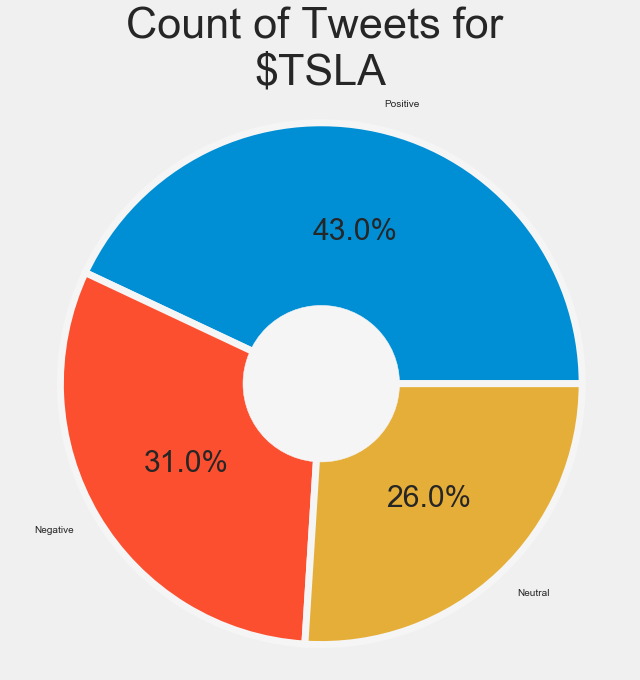

In [225]:
print(df.feel.value_counts())

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 30
fig, ax = plt.subplots(figsize=(10,10))

ax.pie(list(df.feel.value_counts()), 
       labels=df.feel.value_counts().index, 
       autopct='%1.1f%%',
       wedgeprops = { 'linewidth': 7, 'edgecolor': 'whitesmoke' })

circle = plt.Circle((0,0), 0.3, color='whitesmoke')
fig = plt.gcf()
fig.gca().add_artist(circle)

ax.set_title(f'Count of Tweets for \n{subject}')
ax.axis('equal')
plt.show()

### Histogram Plot for the Sentiment scores

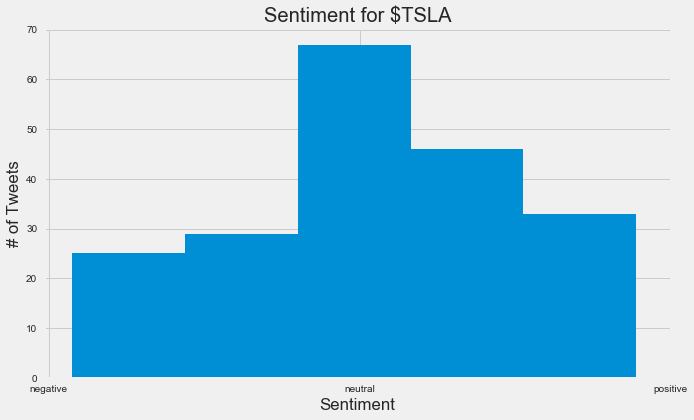

In [240]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(10,6))

# Plotting the sentiment scores
ax.hist(df['sentiment'], bins=5)

plt.title(f"Sentiment for {subject}")
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['negative', 'neutral', 'positive'])
plt.xlabel("Sentiment")
plt.ylabel("# of Tweets")
plt.show()